In [1]:
#nhập thư viện
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#đọc dữ liệu zara.csv
url = "/content/drive/MyDrive/IBM Data Analyst/Project 6: Sales Analysis/zara.csv"
zara = pd.read_csv(url)
zara.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,Product category,section
0,185102,Aisle,No,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [ ]:
zara.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Seasonal',
       'Sales Volume', 'brand', 'url', 'sku', 'name', 'description', 'price',
       'currency', 'scraped_at', 'Product category', 'section'],
      dtype='object')

In [3]:
zara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Seasonal          252 non-null    object 
 4   Sales Volume      252 non-null    int64  
 5   brand             252 non-null    object 
 6   url               252 non-null    object 
 7   sku               252 non-null    object 
 8   name              251 non-null    object 
 9   description       250 non-null    object 
 10  price             252 non-null    float64
 11  currency          252 non-null    object 
 12  scraped_at        252 non-null    object 
 13  Product category  252 non-null    object 
 14  section           252 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 29.7+ KB


In [5]:
#Xử lý đinh dạng
zara[['Sales Volume','price']] = zara[['Sales Volume','price']].astype(float)
zara['scraped_at'] = pd.to_datetime(zara['scraped_at']).dt.date
zara.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,Product category,section
0,185102,Aisle,No,No,2823.0,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19,jackets,MAN
1,188771,Aisle,No,No,654.0,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19,jackets,MAN
2,180176,End-cap,Yes,Yes,2220.0,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19,jackets,MAN
3,112917,Aisle,Yes,Yes,1568.0,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19,jackets,MAN
4,192936,End-cap,No,Yes,2942.0,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19,jackets,MAN


In [7]:
zara['Revenue'] = zara['Sales Volume']*zara['price']

In [26]:
zara[['Sales Volume','price','Revenue']].describe(include = 'all').round(2)

,Sales Volume,price,Revenue
count,252.00,252.00,252.00
mean,1823.70,86.25,154716.18
std,697.70,52.08,107025.25
min,529.00,7.99,4330.58
25%,1243.00,49.90,77599.35
50%,1839.50,79.90,129888.25
75%,2398.75,109.00,199768.50
max,2989.00,439.00,651521.00


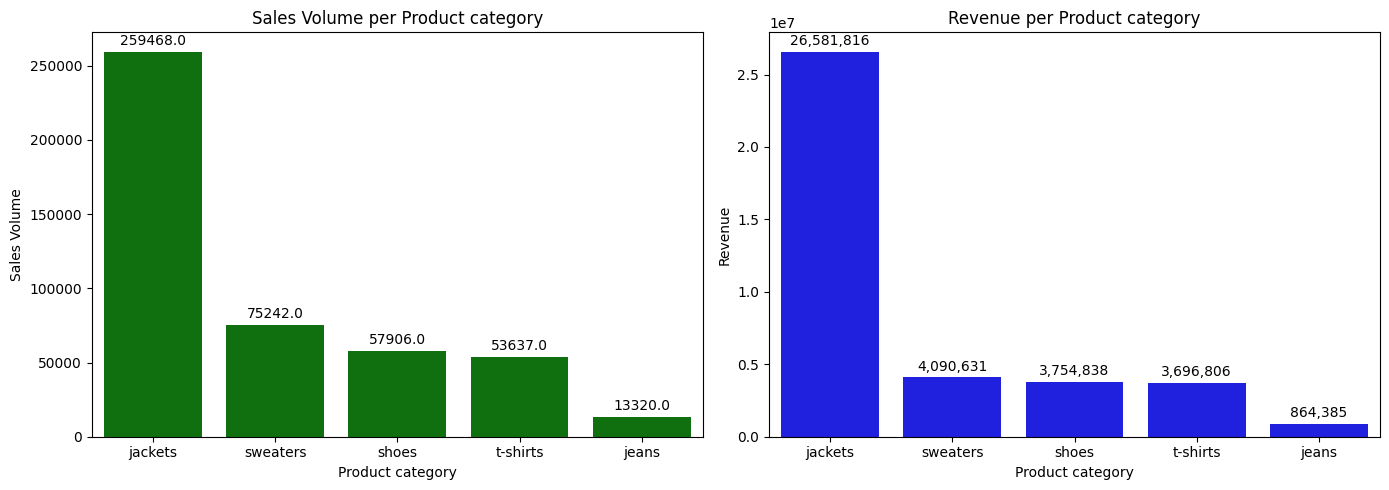

In [16]:
# @title Sales Volume & Sales Revenue per Product category
# Tạo figure với 1 hàng, 2 cột
fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # figsize điều chỉnh kích thước

# Biểu đồ 1 (bên trái)
sales_volume_by_category = zara.groupby('Product category')['Sales Volume'].sum().sort_values(ascending=False)
sns.barplot(x=sales_volume_by_category.index, y=sales_volume_by_category.values, ax=axs[0], color = 'green')
axs[0].set_title('Sales Volume per Product category')
axs[0].set_xlabel('Product category')
axs[0].set_ylabel('Sales Volume')

x = sales_volume_by_category.index
y = sales_volume_by_category.values

for i in range(len(y)):
    axs[0].annotate(str(y[i]), xy=(x[i], y[i]), xytext=(0, 5),
                 textcoords="offset points", ha='center')

# Biểu đồ 2 (bên phải) - Revenue per Product category
revenue_by_category = zara.groupby('Product category')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, ax=axs[1], color = 'blue')
axs[1].set_title('Revenue per Product category')
axs[1].set_xlabel('Product category')
axs[1].set_ylabel('Revenue')

x_rev = revenue_by_category.index
y_rev = revenue_by_category.values

for i in range(len(y_rev)):
    axs[1].annotate(f'{y_rev[i]:,.0f}', xy=(x_rev[i], y_rev[i]), xytext=(0, 5),
                 textcoords="offset points", ha='center')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [ ]:
# @title Nhận xét: Số lượng bán & doanh thu từ nhóm sản phẩm jackets cáo nhất, thấp nhất là jeans. Có vẻ số lượng bán và doanh thu có mối quan hệ tuyến tính tích cực.

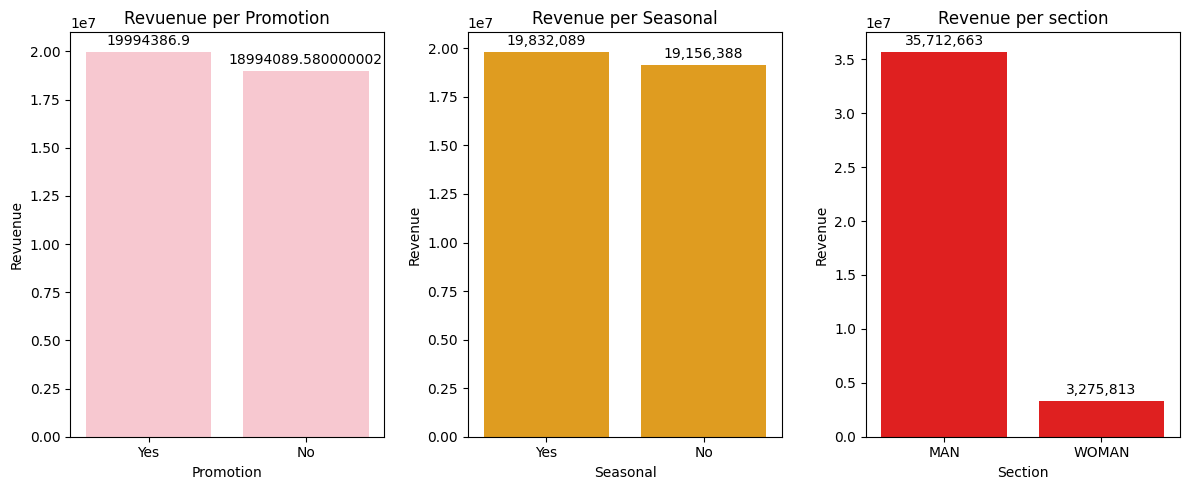

In [22]:
# @title revenue per Promotion & Seasonal & section
# Tạo figure với 1 hàng, 2 cột
fig, axs = plt.subplots(1, 3, figsize=(12, 5))  # figsize điều chỉnh kích thước

# Biểu đồ 1 (bên trái)
re_pro = zara.groupby('Promotion')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=re_pro.index, y=re_pro.values, ax=axs[0], color = 'pink')
axs[0].set_title('Revuenue per Promotion')
axs[0].set_xlabel('Promotion')
axs[0].set_ylabel('Revuenue')

x = re_pro.index
y = re_pro.values

for i in range(len(y)):
    axs[0].annotate(str(y[i]), xy=(x[i], y[i]), xytext=(0, 5),
                 textcoords="offset points", ha='center')

# Biểu đồ 2 (giữa)
re_se = zara.groupby('Seasonal')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=re_se.index, y=re_se.values, ax=axs[1], color = 'orange')
axs[1].set_title('Revenue per Seasonal')
axs[1].set_xlabel('Seasonal')
axs[1].set_ylabel('Revenue')

x_rev = re_se.index
y_rev = re_se.values

for i in range(len(y_rev)):
    axs[1].annotate(f'{y_rev[i]:,.0f}', xy=(x_rev[i], y_rev[i]), xytext=(0, 5),
                 textcoords="offset points", ha='center')

# Biểu đồ 3 (bên phải)
re_sec = zara.groupby('section')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=re_sec.index, y=re_sec.values, ax=axs[2], color = 'red')
axs[2].set_title('Revenue per section')
axs[2].set_xlabel('Section')
axs[2].set_ylabel('Revenue')

x_re = re_sec.index
y_re = re_sec.values

for i in range(len(y_re)):
    axs[2].annotate(f'{y_re[i]:,.0f}', xy=(x_re[i], y_re[i]), xytext=(0, 5),
                 textcoords="offset points", ha='center')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [ ]:
# @title Nhận xét: Không có dự khác biệt rõ rệt chênh lệch doanh số theo Promotion, Seasonal nhưng giữa section thì có chênh lệch doanh thu lớn giữ Man v& Woman. Man chiếm trong doanh số gấp hơn 10 lần woman.

In [24]:
# @title Mô hình dự báo revenue theo Sales volume, price
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Thiết lập biến mục tiêu và danh sách biến đầu vào
target = "Revenue"
cols = ['Sales Volume', 'price']
predictors = [col for col in cols if col != target]

# Tính R-squared cho từng biến
r2_scores = {
    var: r2_score(zara[target], LinearRegression().fit(zara[[var]], zara[target]).predict(zara[[var]]))
    for var in predictors
}

# In bảng R-squared đầy đủ
print("\n R-squared cho từng biến:")
for var, r2 in sorted(r2_scores.items(), key=lambda x: -x[1]):
    print(f"{var:<18}: {r2:.4f}")


 R-squared cho từng biến:
price             : 0.5684
Sales Volume      : 0.2501


In [ ]:
# @title Nhận xét: R-squared (price) cao hơn cho thấy biến price là lựa chọn tốt hơn cho mô hình tuyến tính dự báo doanh thu.

In [28]:
# @title Tạo mô hình với cả hai biến dự báo là Sales Volume & price
# Tạo mô hình
X = zara[['Sales Volume', 'price']]
y = zara["Revenue"]
model = LinearRegression().fit(X, y)

# Tính R-squared
r2_scores = model.score(X, y)
print(f"R-squared: {r2_scores:.4f}")

R-squared: 0.8767


In [ ]:
# @title Nhận xét: Sử dụng 2 biến giúp cải thiện mô hình dự  (R2 tăng từ 0.5684 lên 0.8767)

In [29]:
# So sánh thực tế và dự đoán
zara['PredictRe']= model.predict(X)
print(zara[['Sales Volume', 'price','Revenue', 'PredictRe']])

# Đánh giá độ chính xác
mse = mean_squared_error(y, zara["PredictRe"])
r2 = r2_score(y, zara["PredictRe"])
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2%}")

     Sales Volume   price    Revenue      PredictRe
0          2823.0   19.99   56431.77  131987.607994
1           654.0  169.00  110526.00  189777.237348
2          2220.0  129.00  286380.00  258271.498625
3          1568.0  129.00  202272.00  202594.443294
4          2942.0  139.00  408938.00  336234.438075
..            ...     ...        ...            ...
247        1014.0  169.00  171366.00  220519.169739
248        2222.0  159.00  353298.00  307367.145605
249        2534.0   12.99   32916.66   95892.867516
250        1466.0   19.90   29173.40   15960.827157
251        2870.0   39.90  114513.00  168470.935793

[252 rows x 4 columns]
MSE: 1406679761.28
R-squared: 87.67%


In [ ]:
# @title Nhận xét: Với R-squared cao, giải thích được 87.67% biến động -> mô hình dự đoán doanh thu tốt nhưng MSE (1406679761.28) còn lớn nên vẫn cần cải thiện mô hình (data có trong 1 ngày nên có thể ảnh hưởng tới hiệu quả của mô hình)